# Quantitative Analysis of p-n Junction
This notebook quantifies the maximum electric field and depletion width for varying doping concentrations (N_a, N_d) using poisson_solver.py (PBL Level 3).

Using poisson_solver from: c:\Users\earme\OneDrive\Desktop\pn-junction-modeling\code\poisson_solver.py


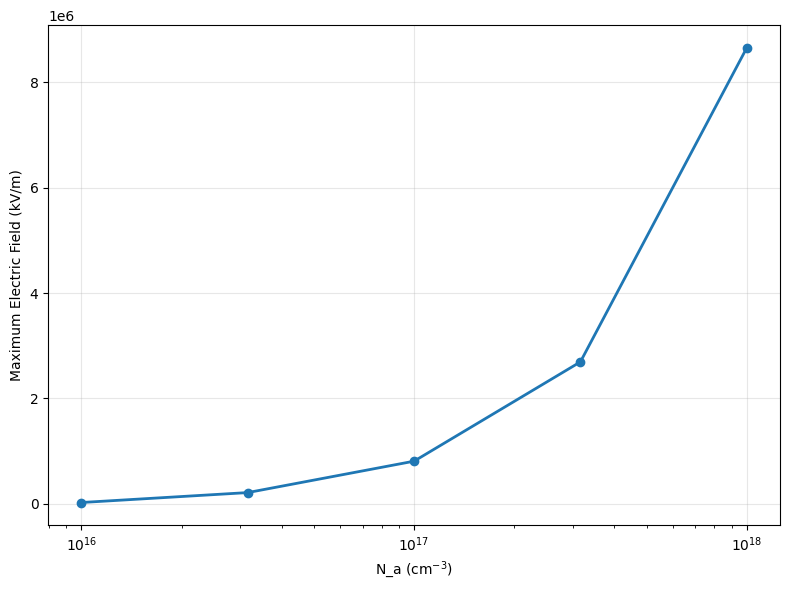

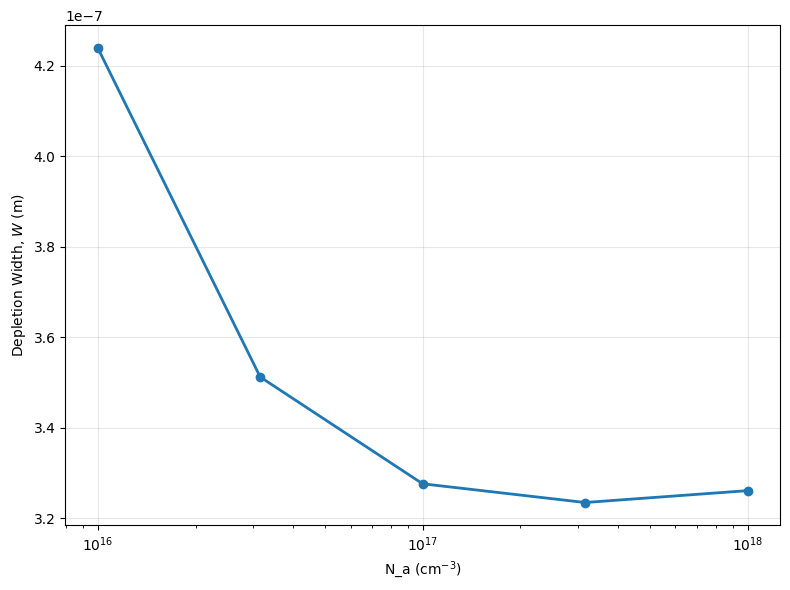

In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
os.environ["PYTHONDONTWRITEBYTECODE"] = "1"
base_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'code'))
sys.path.append(base_dir)
from poisson_solver import poisson_solver
plots_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'plots'))
os.makedirs(plots_dir, exist_ok=True)
print(f"Using poisson_solver from: {os.path.join(base_dir, 'poisson_solver.py')}")

# Parameters
q = 1.6e-19; k = 1.38e-23; eps_0 = 8.854e-12; eps_r = 11.7; T = 300; N_i = 1.5e16
N_a_values = np.logspace(16, 18, 5) * 1e6
N_d = 1e16 * 1e6
x = np.linspace(-1e-5, 1e-5, 50)
max_E = []
W_values = []

for N_a in N_a_values:
    V_bi = k * T / q * np.log(N_a * N_d / N_i**2)
    try:
        E, _ = poisson_solver(N_a, N_d, V_bi, x=x, delta=2e-5)
        max_E.append(np.max(np.abs(E)))
        W = np.sqrt((2 * eps_r * eps_0 * V_bi / q) * (1.0/N_a + 1.0/N_d))
        W_values.append(W)
    except Exception as e:
        print(f"Error for N_a={N_a/1e6:.1e}: {e}")

plt.figure(figsize=(8, 6))
plt.plot(N_a_values / 1e6, np.array(max_E) / 1e3, 'o-', linewidth=2)
plt.xscale('log')
plt.xlabel('N_a (cm$^{-3}$)')
plt.ylabel('Maximum Electric Field (kV/m)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'max_E_doping.png'), dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(N_a_values / 1e6, W_values, 'o-', linewidth=2)
plt.xscale('log')
plt.xlabel('N_a (cm$^{-3}$)')
plt.ylabel('Depletion Width, $W$ (m)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'W_doping.png'), dpi=300, bbox_inches='tight')
plt.show()